Analizo relaciones entre region y territorio con distintos factores.
En principio la idea es hacer un grafico orientado hacia el VisuChallenge
donde la idea es dibujar las banderas para las regiones/territorios en donde
cada punto es una oportunidad ganada, o sino hacer lo mismo pero haciendo
los puntos sobre un MapaMundi (planisferio).

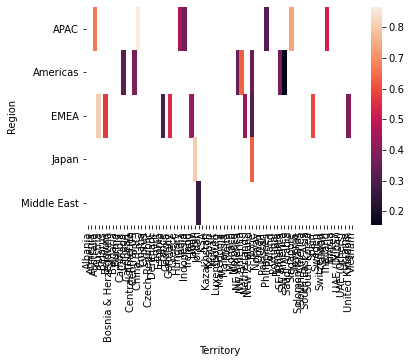

In [48]:
import pandas as pd
import seaborn as sns

data = pd.read_csv('Entrenamieto_ECI_2020.csv')
data.drop_duplicates(subset='Opportunity_ID', inplace=True)

regions = data[['Region', 'Territory', 'Stage']]
regions = regions[regions['Stage'].isin(['Closed Won', 'Closed Lost'])]
regions.replace(['Closed Won', 'Closed Lost'], [1, 0], inplace=True)
regionsStats = regions.groupby(['Region', 'Territory']).agg({'Stage':['mean', 'count']}).unstack()
regionsStats = regionsStats[regionsStats[('Stage', 'count')] > 50]
regionsStats = regionsStats[('Stage', 'mean')]


sns.heatmap(data=regionsStats, yticklabels=True, xticklabels=True)